In [1]:
from GromacsHelpers import *
%matplotlib inline

### Setup Gromacs

In [6]:
def gmx(args):
    cmd = ". /home/ubuntu/gromacs-2016.2/bin/GMXRC; gmx %s" % args;
    !{"%s" % cmd}

In [4]:
gmx("-version")

                         :-) GROMACS - gmx, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University and

In [5]:
# !{"wget https://files.rcsb.org/download/1L2Y.pdb"}

--2017-02-17 13:23:49--  https://files.rcsb.org/download/1L2Y.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.213.138
Connecting to files.rcsb.org (files.rcsb.org)|132.249.213.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1L2Y.pdb’

1L2Y.pdb                [  <=>               ] 934.35K  3.89MB/s    in 0.2s    

2017-02-17 13:23:49 (3.89 MB/s) - ‘1L2Y.pdb’ saved [956772]



In [8]:
gmx("pdb2gmx -f 1L2Y_cleaned.pdb -o 1L2Y_processed.gro -ignh -water spce <<EOF\n15\nEOF")

                     :-) GROMACS - gmx pdb2gmx, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

In [5]:
gmx("editconf -f 1L2Y_processed.gro -o 1L2Y_newbox.gro -c -d 1.0 -bt cubic")

                     :-) GROMACS - gmx editconf, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm Universit

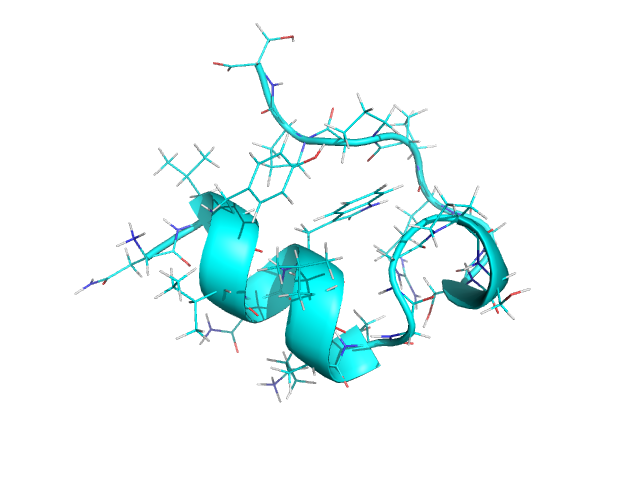

In [4]:
pymolPlotStructure("1L2Y_cleaned.pdb")

In [10]:
gmx("solvate -cp 1L2Y_newbox.gro -cs spc216.gro -o 1L2Y_solv.gro -p topol.top")

In [13]:
gmx("editconf -f 1L2Y_solv.gro -o 1L2Y_solv.pdb")

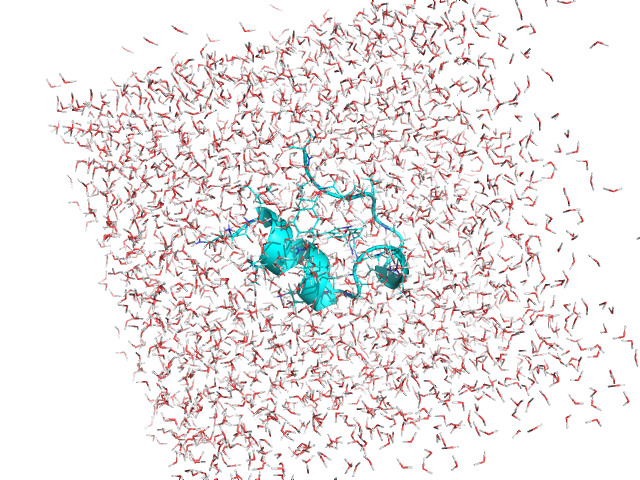

In [3]:
pymolPlotStructure("1L2Y_solv.pdb")

In [15]:
file=open("ions.mdp","w")
file.write("""
; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator	= steep		; Algorithm (steep = steepest descent minimization)
emtol		= 1000.0  	; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01      ; Energy step size
nsteps		= 50000	  	; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist		    = 1		    ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet
ns_type		    = grid		; Method to determine neighbor list (simple, grid)
coulombtype	    = PME		; Treatment of long range electrostatic interactions
rcoulomb	    = 1.0		; Short-range electrostatic cut-off
rvdw		    = 1.0		; Short-range Van der Waals cut-off
pbc		        = xyz 		; Periodic Boundary Conditions (yes/no)
""")
file.close()

In [16]:
gmx("grompp -f ions.mdp -c 1L2Y_solv.gro -p topol.top -o ions.tpr")

In [18]:
gmx("genion -s ions.tpr -o 1L2Y_solv_ions.gro -p topol.top -pname NA -nname CL -nn 1 <<EOF\n13\nEOF")

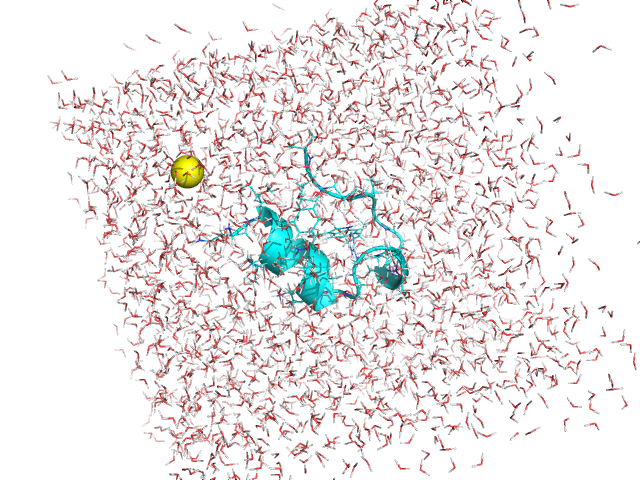

In [7]:
gmx("editconf -f 1L2Y_solv_ions.gro -o 1L2Y_solv_ions.pdb")
pymolPlotStructure("1L2Y_solv_ions.pdb")

In [22]:
file=open("minim.mdp","w")
file.write("""
; minim.mdp - used as input into grompp to generate em.tpr
integrator	= steep		; Algorithm (steep = steepest descent minimization)
emtol		= 1000.0  	; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01      ; Energy step size
nsteps		= 50000	  	; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist		    = 1		    ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet
ns_type		    = grid		; Method to determine neighbor list (simple, grid)
coulombtype	    = PME		; Treatment of long range electrostatic interactions
rcoulomb	    = 1.0		; Short-range electrostatic cut-off
rvdw		    = 1.0		; Short-range Van der Waals cut-off
pbc		        = xyz 		; Periodic Boundary Conditions (yes/no)
""")
file.close()
gmx("grompp -f minim.mdp -c 1L2Y_solv_ions.gro -p topol.top -o em.tpr")
gmx("mdrun -v -deffnm em")

In [4]:
gmx("energy -f em.edr -o potential.xvg <<EOF\n10\nEOF")

                      :-) GROMACS - gmx energy, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

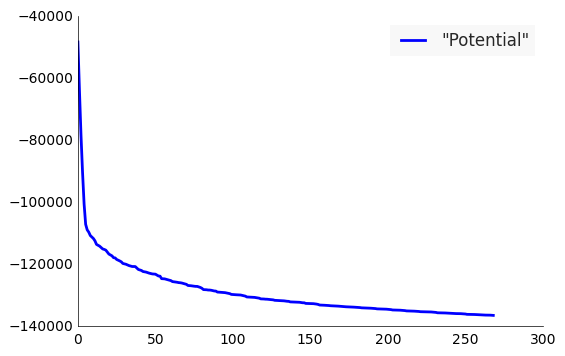

In [10]:
plotFigure("potential.xvg")

In [12]:
file=open("nvt.mdp","w")
file.write("""
title		= OPLS Lysozyme NVT equilibration 
define		= -DPOSRES	; position restrain the protein
; Run parameters
integrator	= md		; leap-frog integrator
nsteps		= 50000		; 2 * 50000 = 100 ps
dt		    = 0.002		; 2 fs
; Output control
nstxout		= 500		; save coordinates every 1.0 ps
nstvout		= 500		; save velocities every 1.0 ps
nstenergy	= 500		; save energies every 1.0 ps
nstlog		= 500		; update log file every 1.0 ps
; Bond parameters
continuation	        = no		; first dynamics run
constraint_algorithm    = lincs	    ; holonomic constraints 
constraints	            = all-bonds	; all bonds (even heavy atom-H bonds) constrained
lincs_iter	            = 1		    ; accuracy of LINCS
lincs_order	            = 4		    ; also related to accuracy
; Neighborsearching
cutoff-scheme   = Verlet
ns_type		    = grid		; search neighboring grid cells
nstlist		    = 10		; 20 fs, largely irrelevant with Verlet
rcoulomb	    = 1.0		; short-range electrostatic cutoff (in nm)
rvdw		    = 1.0		; short-range van der Waals cutoff (in nm)
; Electrostatics
coulombtype	    = PME	; Particle Mesh Ewald for long-range electrostatics
pme_order	    = 4		; cubic interpolation
fourierspacing	= 0.16	; grid spacing for FFT
; Temperature coupling is on
tcoupl		= V-rescale	            ; modified Berendsen thermostat
tc-grps		= Protein Non-Protein	; two coupling groups - more accurate
tau_t		= 0.1	  0.1           ; time constant, in ps
ref_t		= 300 	  300           ; reference temperature, one for each group, in K
; Pressure coupling is off
pcoupl		= no 		; no pressure coupling in NVT
; Periodic boundary conditions
pbc		= xyz		    ; 3-D PBC
; Dispersion correction
DispCorr	= EnerPres	; account for cut-off vdW scheme
; Velocity generation
gen_vel		= yes		; assign velocities from Maxwell distribution
gen_temp	= 300		; temperature for Maxwell distribution
gen_seed	= -1		; generate a random seed
""")
file.close()
gmx("grompp -f nvt.mdp -c em.gro -p topol.top -o nvt.tpr")
gmx("mdrun -v -deffnm nvt")

                      :-) GROMACS - gmx grompp, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

                      :-) GROMACS - gmx energy, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

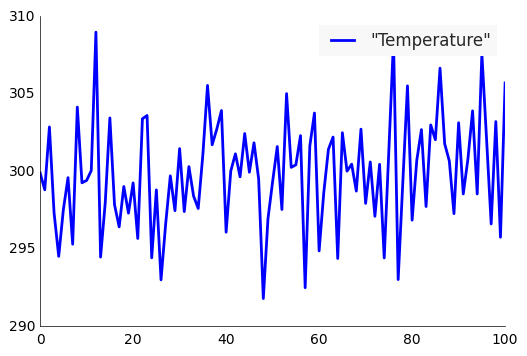

In [14]:
gmx("energy -f nvt.edr -o temperature.xvg <<EOF\n15\nEOF")
plotFigure("temperature.xvg")

In [15]:
file=open("npt.mdp","w")
file.write("""
title		= OPLS Lysozyme NPT equilibration 
define		= -DPOSRES	; position restrain the protein
; Run parameters
integrator	= md		; leap-frog integrator
nsteps		= 50000		; 2 * 50000 = 100 ps
dt		    = 0.002		; 2 fs
; Output control
nstxout		= 500		; save coordinates every 1.0 ps
nstvout		= 500		; save velocities every 1.0 ps
nstenergy	= 500		; save energies every 1.0 ps
nstlog		= 500		; update log file every 1.0 ps
; Bond parameters
continuation	        = yes		; Restarting after NVT 
constraint_algorithm    = lincs	    ; holonomic constraints 
constraints	            = all-bonds	; all bonds (even heavy atom-H bonds) constrained
lincs_iter	            = 1		    ; accuracy of LINCS
lincs_order	            = 4		    ; also related to accuracy
; Neighborsearching
cutoff-scheme   = Verlet
ns_type		    = grid		; search neighboring grid cells
nstlist		    = 10	    ; 20 fs, largely irrelevant with Verlet scheme
rcoulomb	    = 1.0		; short-range electrostatic cutoff (in nm)
rvdw		    = 1.0		; short-range van der Waals cutoff (in nm)
; Electrostatics
coulombtype	    = PME		; Particle Mesh Ewald for long-range electrostatics
pme_order	    = 4		    ; cubic interpolation
fourierspacing	= 0.16		; grid spacing for FFT
; Temperature coupling is on
tcoupl		= V-rescale	            ; modified Berendsen thermostat
tc-grps		= Protein Non-Protein	; two coupling groups - more accurate
tau_t		= 0.1	  0.1	        ; time constant, in ps
ref_t		= 300 	  300	        ; reference temperature, one for each group, in K
; Pressure coupling is on
pcoupl		        = Parrinello-Rahman	    ; Pressure coupling on in NPT
pcoupltype	        = isotropic	            ; uniform scaling of box vectors
tau_p		        = 2.0		            ; time constant, in ps
ref_p		        = 1.0		            ; reference pressure, in bar
compressibility     = 4.5e-5	            ; isothermal compressibility of water, bar^-1
refcoord_scaling    = com
; Periodic boundary conditions
pbc		= xyz		; 3-D PBC
; Dispersion correction
DispCorr	= EnerPres	; account for cut-off vdW scheme
; Velocity generation
gen_vel		= no		; Velocity generation is off 
""")
file.close()
gmx("grompp -f npt.mdp -c nvt.gro -t nvt.cpt -p topol.top -o npt.tpr")
gmx("mdrun -v -deffnm npt")

                      :-) GROMACS - gmx grompp, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

                      :-) GROMACS - gmx energy, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

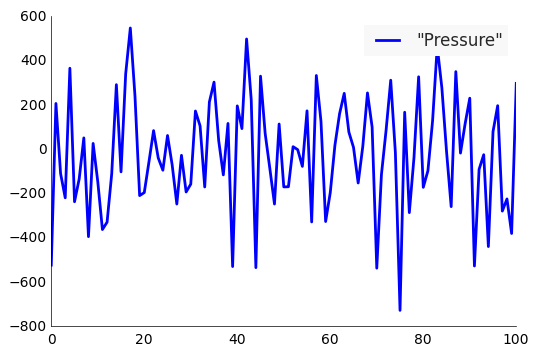

In [16]:
gmx("energy -f npt.edr -o pressure.xvg <<EOF\n16\nEOF")
plotFigure("pressure.xvg")

                      :-) GROMACS - gmx energy, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

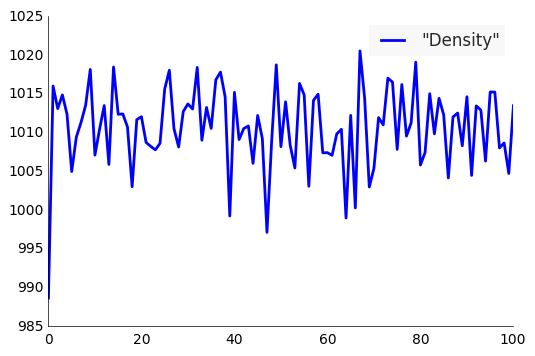

In [17]:
gmx("energy -f npt.edr -o density.xvg <<EOF\n22\nEOF")
plotFigure("density.xvg")

In [18]:
file=open("md.mdp","w")
file.write("""
title		= OPLS Lysozyme MD simulation 
; Run parameters
integrator	= md		; leap-frog integrator
nsteps		= 500000	; 2 * 500000 = 1000 ps (1 ns)
dt		    = 0.002		; 2 fs
; Output control
nstxout		        = 5000		; save coordinates every 10.0 ps
nstvout		        = 5000		; save velocities every 10.0 ps
nstenergy	        = 5000		; save energies every 10.0 ps
nstlog		        = 5000		; update log file every 10.0 ps
nstxout-compressed  = 5000      ; save compressed coordinates every 10.0 ps
                                ; nstxout-compressed replaces nstxtcout
compressed-x-grps   = System    ; replaces xtc-grps
; Bond parameters
continuation	        = yes		; Restarting after NPT 
constraint_algorithm    = lincs	    ; holonomic constraints 
constraints	            = all-bonds	; all bonds (even heavy atom-H bonds) constrained
lincs_iter	            = 1		    ; accuracy of LINCS
lincs_order	            = 4		    ; also related to accuracy
; Neighborsearching
cutoff-scheme   = Verlet
ns_type		    = grid		; search neighboring grid cells
nstlist		    = 10	    ; 20 fs, largely irrelevant with Verlet scheme
rcoulomb	    = 1.0		; short-range electrostatic cutoff (in nm)
rvdw		    = 1.0		; short-range van der Waals cutoff (in nm)
; Electrostatics
coulombtype	    = PME		; Particle Mesh Ewald for long-range electrostatics
pme_order	    = 4		    ; cubic interpolation
fourierspacing	= 0.16		; grid spacing for FFT
; Temperature coupling is on
tcoupl		= V-rescale	            ; modified Berendsen thermostat
tc-grps		= Protein Non-Protein	; two coupling groups - more accurate
tau_t		= 0.1	  0.1	        ; time constant, in ps
ref_t		= 300 	  300	        ; reference temperature, one for each group, in K
; Pressure coupling is on
pcoupl		        = Parrinello-Rahman	    ; Pressure coupling on in NPT
pcoupltype	        = isotropic	            ; uniform scaling of box vectors
tau_p		        = 2.0		            ; time constant, in ps
ref_p		        = 1.0		            ; reference pressure, in bar
compressibility     = 4.5e-5	            ; isothermal compressibility of water, bar^-1
; Periodic boundary conditions
pbc		= xyz		; 3-D PBC
; Dispersion correction
DispCorr	= EnerPres	; account for cut-off vdW scheme
; Velocity generation
gen_vel		= no		; Velocity generation is off 
""")
file.close()
gmx("grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr")
gmx("mdrun -v -deffnm md_0_1")

                      :-) GROMACS - gmx grompp, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

                     :-) GROMACS - gmx trjconv, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


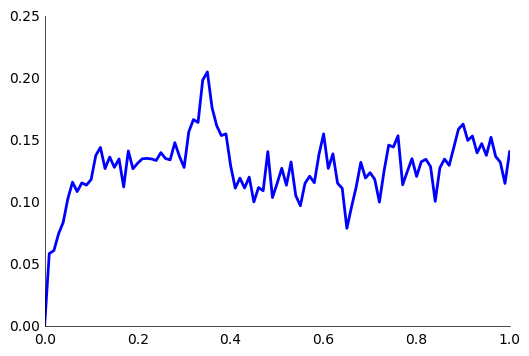

In [19]:
gmx("trjconv -s md_0_1.tpr -f md_0_1.xtc -o md_0_1_noPBC.xtc -pbc mol -ur compact <<EOF\n0\nEOF")
gmx("rms -s md_0_1.tpr -f md_0_1_noPBC.xtc -o rmsd.xvg -tu ns <<EOF\n4\n4\nEOF")
plotFigure("rmsd.xvg")

                      :-) GROMACS - gmx energy, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

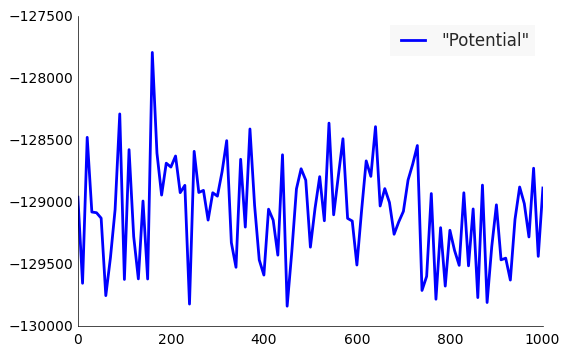

In [21]:
gmx("energy -f md_0_1.edr -o pe.xvg <<EOF\n10\nEOF")
plotFigure("pe.xvg")

In [22]:
gmx("trjconv -s md_0_1.tpr -f md_0_1_noPBC.xtc -o md_0_1.pdb -pbc nojump -dt 10 <<EOF\n1\nEOF")

                     :-) GROMACS - gmx trjconv, 2016.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

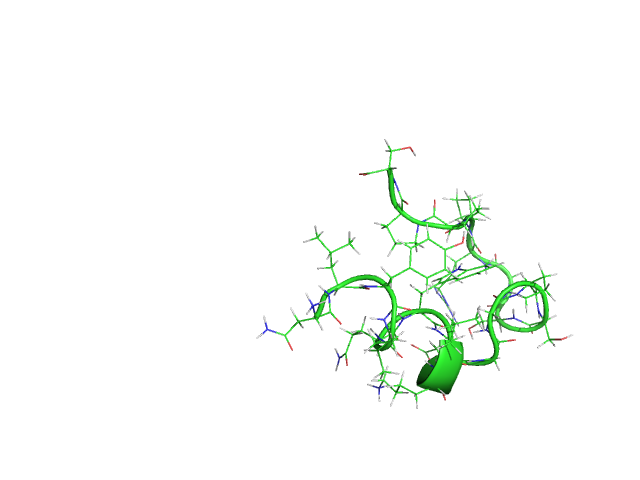

In [2]:
pymolPlotStructure("md_0_1.pdb")

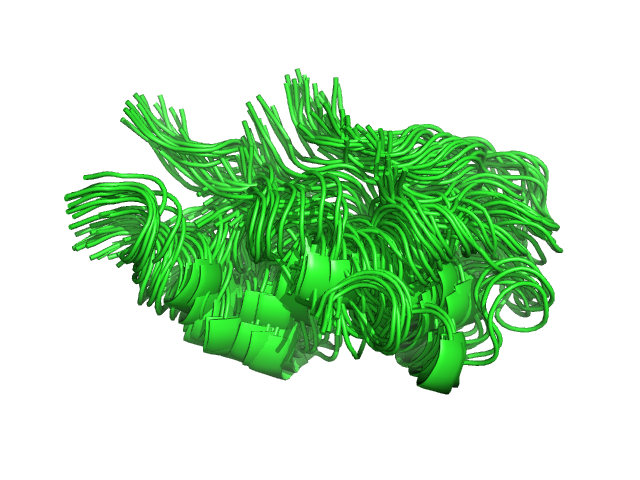

In [1]:

pymolFlexibilityPlot("md_0_1.pdb")